In [22]:

%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.signal as sig

os.chdir(os.path.dirname(os.getcwd()))
import spatial_metrics.helper_functions as hf
import spatial_metrics.cell_model_base as cs_model
import spatial_metrics.detect_peaks as dp
import spatial_metrics.spatial_metrics_spikes_base as pl_spk
import spatial_metrics.spatial_prediction_spikes_base as sp_spk


In [2]:

srate = 100. # points/frames per second
total_Time = 1000 # in seconds
_lambda = 20 # how much your neuron should spike
environment_edges = [[0,50],[0,50]] # in cm [[x1,x2],[y1,y2]]

x_coordinates,y_coordinates,speed,xy_timevector = cs_model.generate_random_walk(input_srate = srate,input_total_Time = total_Time,heading_srate = 10., speed_srate = 5., rho1  = 1,sigma = 0.02,mu_e  = 0.,smooth_coeff = 0.5,environment_edges = environment_edges)
total_points = xy_timevector.shape[0]

timestamps = cs_model.generate_arrivals(_lambda,total_Time)
I_timestamps = (timestamps*srate).astype(int)

# place cell with one field: x_center and y_center is the location of the place field in ehe environment; s is the field variance
I_timestamps1 = cs_model.digitize_spiketimes(x_coordinates,y_coordinates,I_timestamps,x_center = 35,y_center = 25, s = 2)
I_timestamps2 = cs_model.digitize_spiketimes(x_coordinates,y_coordinates,I_timestamps,x_center = 15,y_center = 40, s = 2)

I_timestamps = []
I_timestamps.append(I_timestamps1)
I_timestamps.append(I_timestamps2)


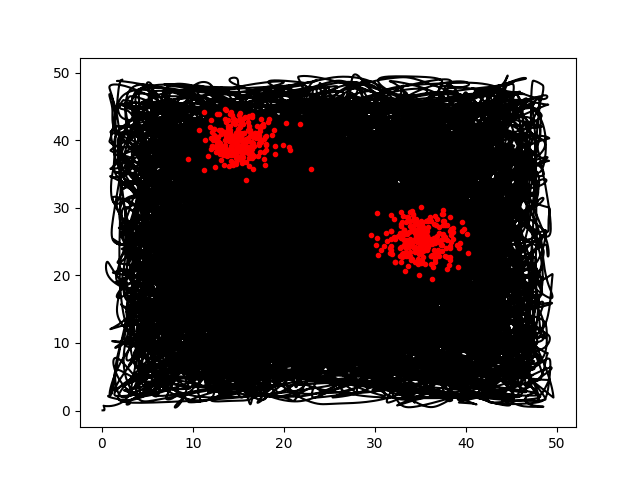

In [3]:

plt.figure()
plt.plot(x_coordinates,y_coordinates,'k')
plt.plot(x_coordinates[I_timestamps[0]],y_coordinates[I_timestamps[0]],'r.')
plt.plot(x_coordinates[I_timestamps[1]],y_coordinates[I_timestamps[1]],'r.')
plt.show()


In [4]:

input_dict = dict()
input_dict['saving_string'] = 'SpatialMetrics'
input_dict['animal_id'] = 'NeuronModel'
input_dict['dataset'] = 'Simulation'
input_dict['day'] = 1
input_dict['neuron'] = 1
input_dict['trial'] = None
input_dict['mean_video_srate'] = srate
input_dict['min_time_spent'] = 0
input_dict['min_visits'] = 0
input_dict['min_speed_threshold'] = 0
input_dict['x_bin_size'] = 1 # y bin size in cm
input_dict['y_bin_size'] = 1 # y bin size in cm
input_dict['environment_edges'] = environment_edges # in cm
input_dict['shift_time'] = 200
input_dict['num_cores'] = 20
input_dict['num_surrogates'] = 12
input_dict['saving_path'] = None
input_dict['saving'] = False
input_dict['smoothing_size'] = 2
input_dict['num_of_folds'] = 10
input_dict['non_overlap'] = 0.1
input_dict['window_length'] = 0.1

spatial_prediction_object = sp_spk.SpatialPrediction(**input_dict)
spatial_prediction_output = spatial_prediction_object.main(I_timestamps,xy_timevector,x_coordinates,y_coordinates)


File not saved!


In [14]:

spatial_prediction_output.keys()


dict_keys(['concat_accuracy', 'concat_continuous_error', 'concat_mean_error', 'spatial_error', 'spatial_error_smoothed', 'x_grid', 'y_grid', 'x_center_bins', 'y_center_bins', 'numb_events', 'events_index', 'events_x_localization', 'events_y_localization', 'input_parameters'])

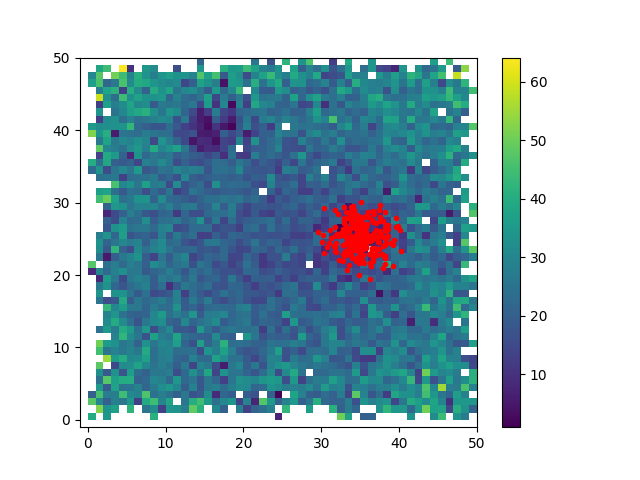

In [5]:

neuron = 0

plt.figure()
plt.pcolormesh(spatial_prediction_output['x_center_bins'],spatial_prediction_output['y_center_bins'],spatial_prediction_output['spatial_error'])
plt.plot(spatial_prediction_output['events_x_localization'][neuron],spatial_prediction_output['events_y_localization'][neuron],'r.')
plt.colorbar()
plt.show()


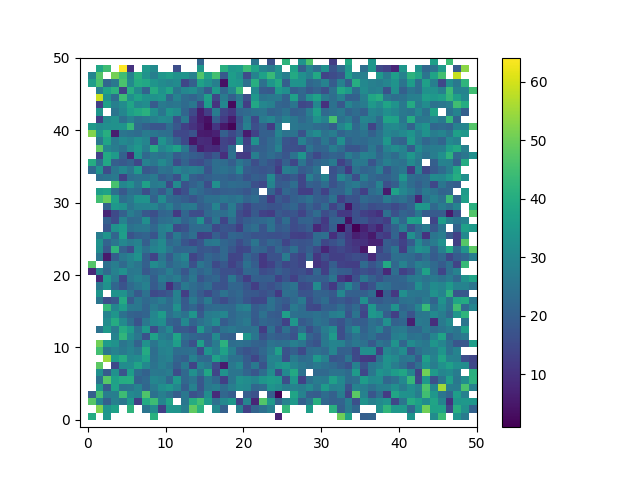

In [6]:

plt.figure()
plt.pcolormesh(spatial_prediction_output['x_center_bins'],spatial_prediction_output['y_center_bins'],spatial_prediction_output['spatial_error'])
plt.colorbar()
plt.show()


In [10]:

input_dict = dict()
input_dict['saving_string'] = 'SpatialMetrics'
input_dict['animal_id'] = 'NeuronModel'
input_dict['dataset'] = 'Simulation'
input_dict['day'] = 1
input_dict['neuron'] = 1
input_dict['trial'] = None
input_dict['video_srate'] = srate
input_dict['min_time_spent'] = 0.01
input_dict['min_visits'] = 5
input_dict['min_speed_threshold'] = 5
input_dict['x_bin_size'] = 1 # y bin size in cm
input_dict['y_bin_size'] = 1 # y bin size in cm
input_dict['environment_edges'] = environment_edges # in cm
input_dict['shift_time'] = 200
input_dict['num_cores'] = 20
input_dict['num_surrogates'] = 12
input_dict['saving_path'] = None
input_dict['saving'] = False
input_dict['smoothing_size'] = 2
input_dict['percentile_threshold'] = 97
input_dict['min_num_of_pixels'] = 4

place_cell = pl_spk.PlaceCell(**input_dict)
place_cell_output = place_cell.main(I_timestamps[0],xy_timevector,x_coordinates,y_coordinates)



[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.


File not saved


[Parallel(n_jobs=20)]: Done  12 out of  12 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  12 out of  12 | elapsed:    6.5s finished
/home/apolo/Documents/GitHubProjects/Information_Metrics/spatial_metrics/spatial_metrics_spikes_base.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(results)


In [22]:
# np.array([0,1,2,3,4,5,6,7,8,9,10])

# 0,1,2
#   1,2,3
#     2,3,4
#       3,4,5
#         4,5,6
#           5,6,7
#             6,7,8
#               7,8,9
#                 8,9,10
                
# (11-3)/1 + 1   

# 0,1,2
#     2,3,4
#         4,5,6
#             6,7,8
#                 8,9,10
# (11-3)/2 + 1

# 0,1,2
#       3,4,5
#             6,7,8 
#                   9,10
# 11-3                

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
# import inspect
# lines = inspect.getsource(place_cell.parallelize_surrogate)
# print(lines)

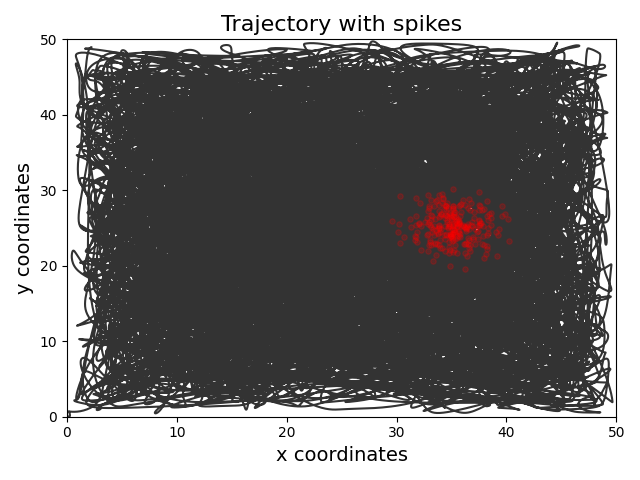

In [11]:

plt.figure()
plt.plot(x_coordinates,y_coordinates,'k',zorder = 1,alpha=0.8)
plt.scatter(place_cell_output['x_peaks_location'],place_cell_output['y_peaks_location'],c='red',s = 15,zorder = 10,alpha=0.2)
plt.title('Trajectory with spikes',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()


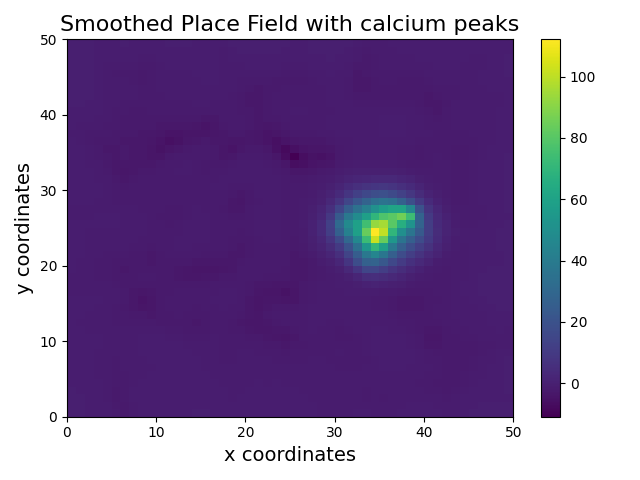

In [12]:

mean_place_field_shuffled = np.nanmean(place_cell_output['place_field_smoothed_shuffled'],0)
std_place_field_shuffled = np.nanstd(place_cell_output['place_field_smoothed_shuffled'],0)
place_field_smoothed = place_cell_output['place_field_smoothed'].copy()
place_field_smoothed_zscored = (place_field_smoothed - mean_place_field_shuffled)/std_place_field_shuffled


plt.figure()
plt.pcolormesh(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_field_smoothed_zscored)
plt.colorbar()
plt.title('Smoothed Place Field with calcium peaks',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()




In [13]:

print(place_cell_output['place_cell_extension_absolute'])
print(place_cell_output['place_cell_extension_relative'])


[0.05843906]
[0.05843906]


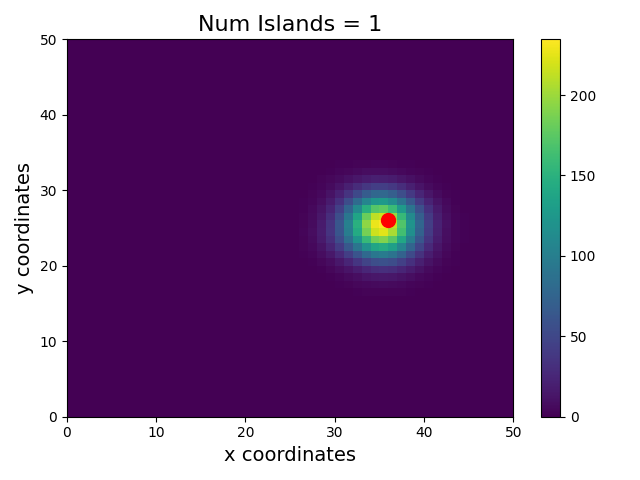

In [14]:

plt.figure()
plt.pcolormesh(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_cell_output['place_field_smoothed'])
plt.colorbar()
plt.plot(place_cell_output['islands_x_max'],place_cell_output['islands_y_max'],'r.',markersize=20)
plt.title('Num Islands = {0}'.format(place_cell_output['num_of_islands']) ,fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()


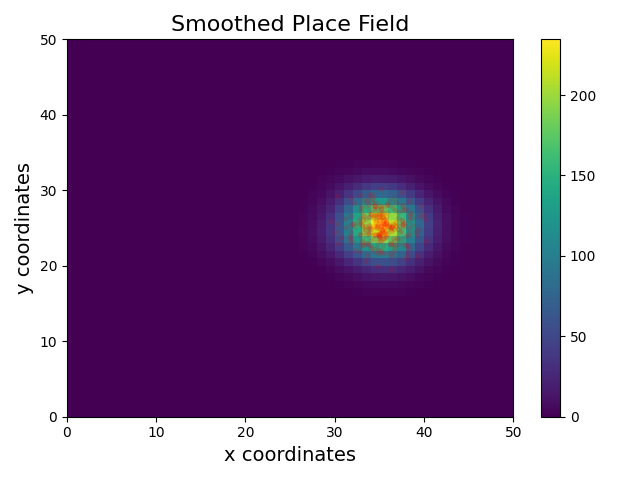

In [15]:

plt.figure()
plt.pcolormesh(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_cell_output['place_field_smoothed'])
plt.colorbar()
plt.plot(place_cell_output['x_peaks_location'],place_cell_output['y_peaks_location'],'r.',alpha=0.1)
plt.title('Smoothed Place Field' ,fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()


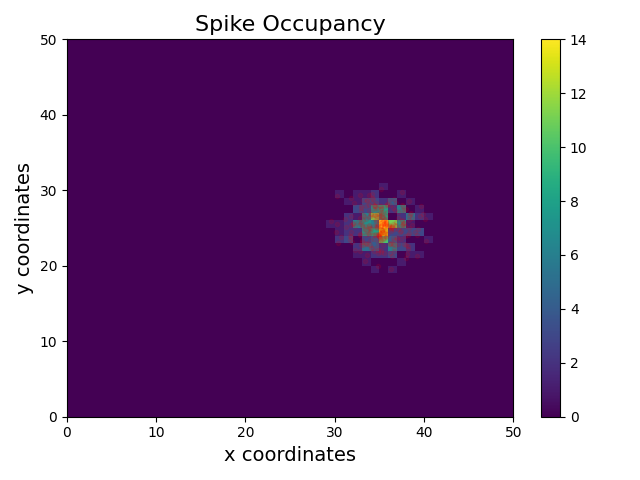

In [16]:

plt.figure()
plt.pcolormesh(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_cell_output['spike_rate_occupancy'])
plt.colorbar()
plt.plot(place_cell_output['x_peaks_location'],place_cell_output['y_peaks_location'],'r.',alpha=0.1)
plt.title('Spike Occupancy',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()


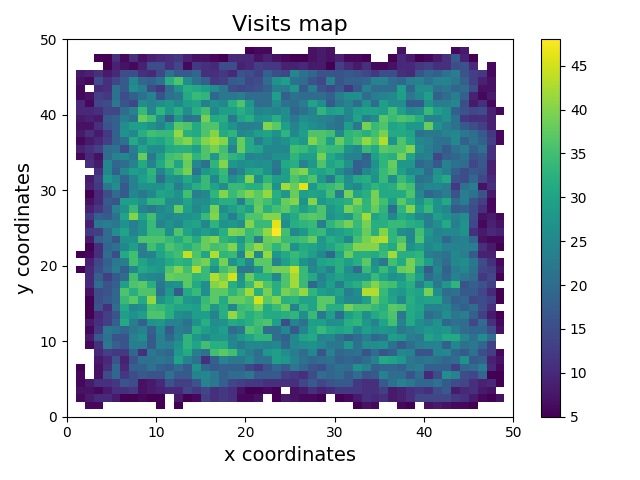

In [17]:

plt.figure()
plt.pcolormesh(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_cell_output['visits_map'])
plt.colorbar()
plt.title('Visits map',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()



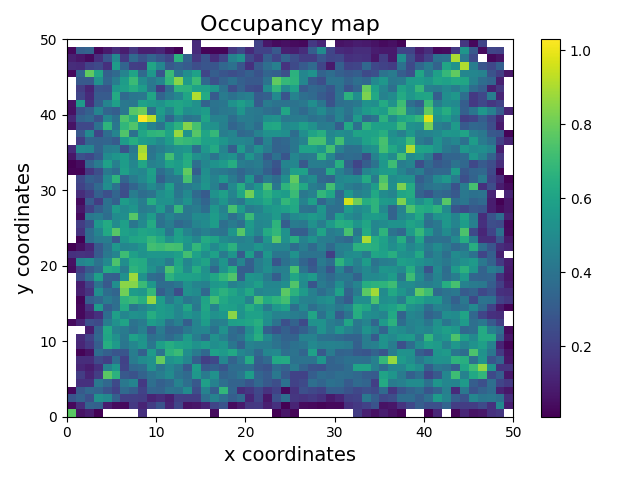

In [18]:

plt.figure()
plt.pcolormesh(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_cell_output['occupancy_map'])
plt.colorbar()
plt.title('Occupancy map',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()



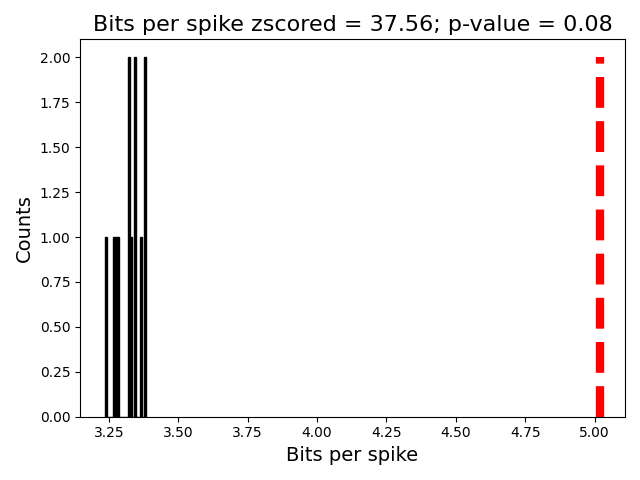

In [19]:
# p value is defined as the amount of shuffled mutual information values above the original one 
p_value = np.sum(place_cell_output['I_spk_permutation'] >= place_cell_output['I_spk'])/place_cell_output['I_spk_permutation'].shape[0]

if p_value == 0:
    p_value = 1/place_cell_output['I_spk_permutation'].shape[0]
p_value

counts,bins = np.histogram(place_cell_output['I_spk_permutation'],20)
bins_centers = bins[0:-1] + np.diff(bins)
bin_width = np.diff(bins_centers)[0]

plt.figure()
plt.bar(bins_centers,counts,color='black',width=bin_width,linewidth=1,edgecolor='black')
plt.plot([place_cell_output['I_spk'],place_cell_output['I_spk']],[0,np.max(counts)],'r--',linewidth=6)
plt.title("Bits per spike zscored = {0:.2f}; p-value = {1:.2f}".format(place_cell_output['I_spk_zscored'],p_value),fontsize=16)
plt.xlabel('Bits per spike',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.tight_layout()
plt.show()


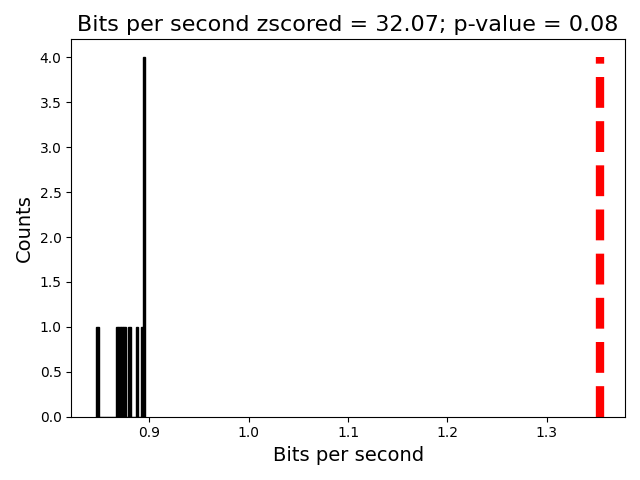

In [20]:
# p value is defined as the amount of shuffled mutual information values above the original one 
p_value = np.sum(place_cell_output['I_sec_permutation'] >= place_cell_output['I_sec'])/place_cell_output['I_sec_permutation'].shape[0]

if p_value == 0:
    p_value = 1/place_cell_output['I_sec_permutation'].shape[0]
p_value

counts,bins = np.histogram(place_cell_output['I_sec_permutation'],20)
bins_centers = bins[0:-1] + np.diff(bins)
bin_width = np.diff(bins_centers)[0]

plt.figure()
plt.bar(bins_centers,counts,color='black',width=bin_width,linewidth=1,edgecolor='black')
plt.plot([place_cell_output['I_sec'],place_cell_output['I_sec']],[0,np.max(counts)],'r--',linewidth=6)
plt.title("Bits per second zscored = {0:.2f}; p-value = {1:.2f}".format(place_cell_output['I_sec_zscored'],p_value),fontsize=16)
plt.xlabel('Bits per second',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.tight_layout()
plt.show()
